In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [10]:
# Generate synthetic financial data
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=100, freq='D')
categories = ['Gold', 'Diamond', 'Silver', 'Platinum']
data = pd.DataFrame({
    'Date': np.random.choice(dates, 200),
    'Category': np.random.choice(categories, 200),
    'Revenue': np.random.randint(1000, 10000, 200),
    'Cost': np.random.randint(500, 7000, 200)
})

data.head()



,Date,Category,Revenue,Cost
0,2023-02-21,Gold,1225,1865
1,2023-04-03,Diamond,5893,4992
2,2023-01-15,Gold,8022,1198
3,2023-03-13,Gold,6600,6820
4,2023-03-02,Silver,8996,6231


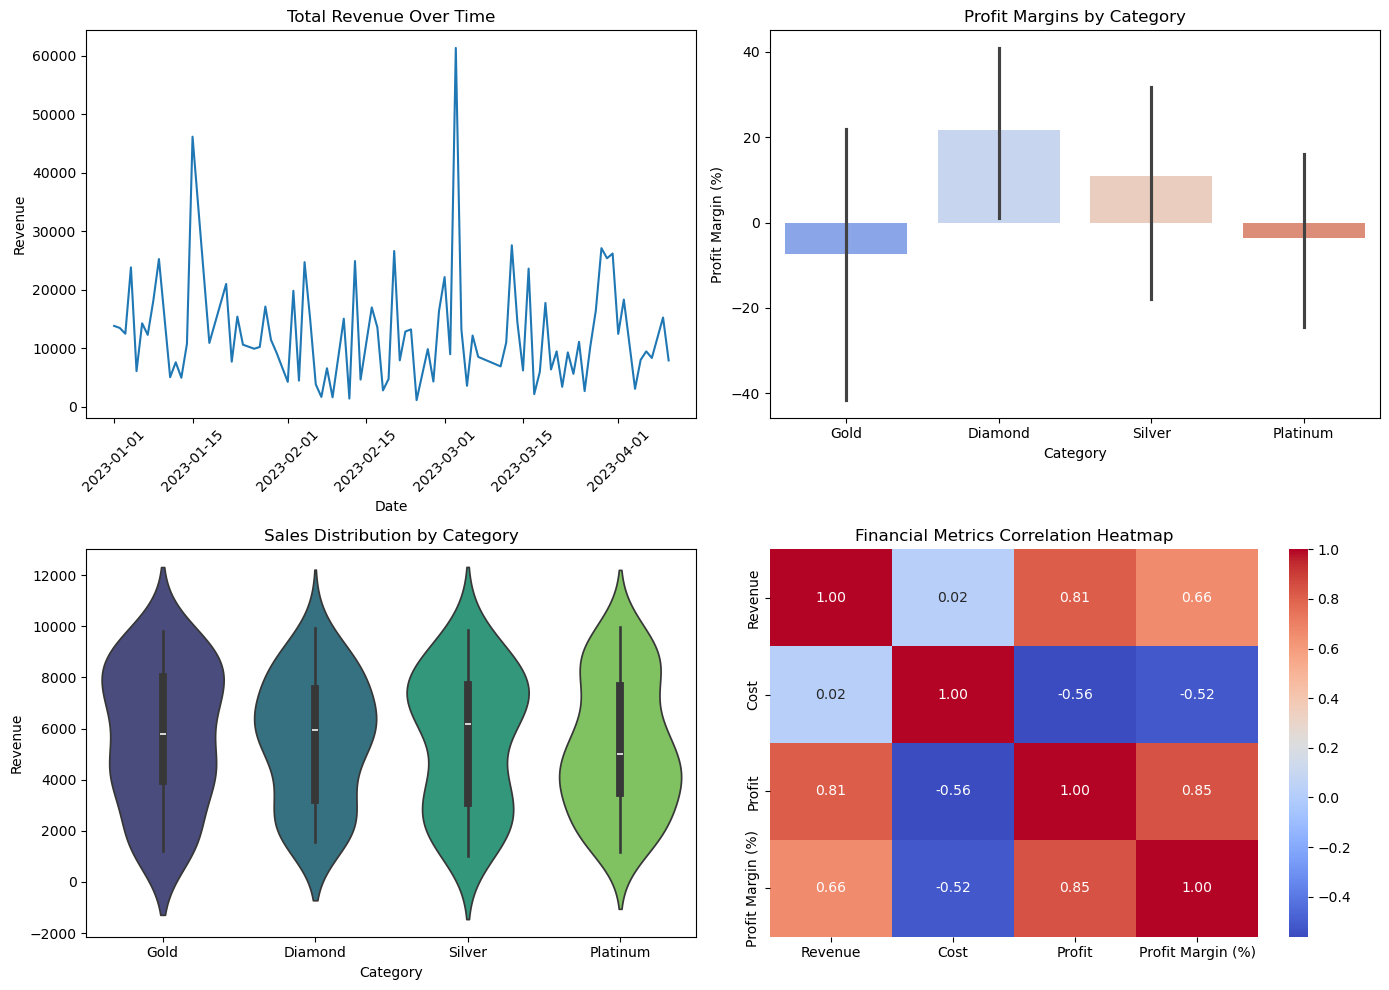

In [8]:
data['Profit'] = data['Revenue'] - data['Cost']
data['Profit Margin (%)'] = (data['Profit'] / data['Revenue']) * 100

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Line Plot - Revenue Over Time
sns.lineplot(data=data.groupby('Date')['Revenue'].sum().reset_index(), x='Date', y='Revenue', ax=axes[0, 0])
axes[0, 0].set_title("Total Revenue Over Time")
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Bar Plot - Profit Margins by Category
sns.barplot(data=data, x='Category', y='Profit Margin (%)', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title("Profit Margins by Category")

# 3. Violin Plot - Sales Distribution
sns.violinplot(data=data, x='Category', y='Revenue', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title("Sales Distribution by Category")

# 4. Heatmap - Correlation Between Metrics
corr = data[['Revenue', 'Cost', 'Profit', 'Profit Margin (%)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title("Financial Metrics Correlation Heatmap")

plt.tight_layout()
plt.savefig("financial_dashboard.png", dpi=300)
plt.show()
